Dissertation - Biomedical Engineering

2020/2021

Ana Catarina Monteiro Magalhães

Computer vision analysis

File: Video_analysis.ipynb

Date: 06-09-2021

Description: This notebook contains the analysis of the data obtained by the zebrafish computer vision method.  


### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib notebook
import scipy.signal as signal
from scipy.signal import find_peaks
from scipy.stats import norm
import statistics
from scipy.optimize import curve_fit

Information of the zebrafish and the section of the data

In [5]:
trial = 3
fish_number = 4
bn = 624
fn = 631
ROI = 'heart'

Opening and reading the file to be analyzed 

In [6]:
f = open("Mean-peixe4-624-631.txt", "r")
s = f.read()
f.close()

Analysis and processing of the information contained in the file 

In [7]:
avg = list(s.split('\n'))
frame = []
time = []
video_dur = fn-bn
nr_frames = len(avg)-1

a = video_dur/nr_frames

# Sampling frequency
fps = 30 

for n in range(1,nr_frames+1):
    frame.append(n)
    time.append(a*n + bn)
    avg[n-1] = float(avg[n-1])

avg = np.array(avg[:-1])

m = avg[:] # List of the intensity pixel values of the selected ROI
t = time[:]

31.0


Video analysis plot

<IPython.core.display.Javascript object>


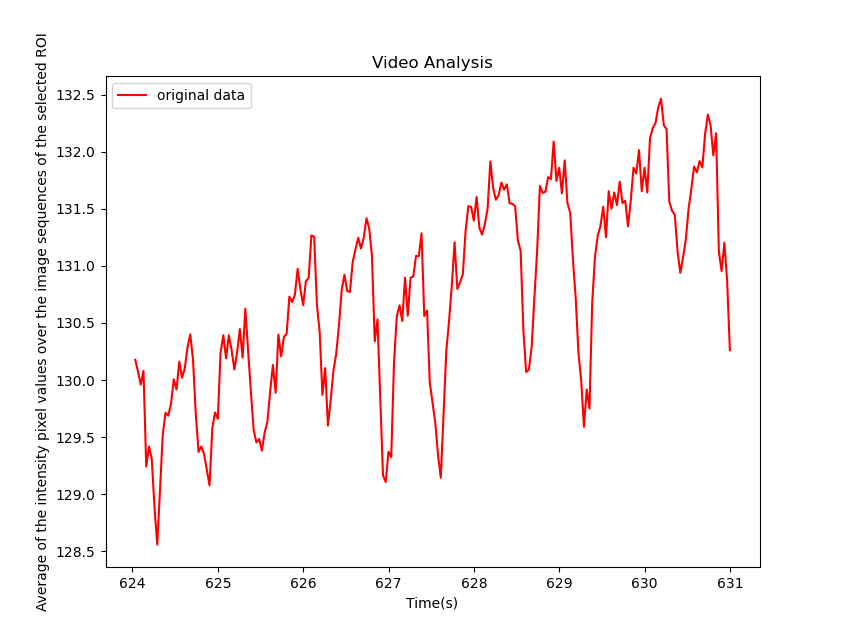

In [9]:
plt.plot(t, m, 'r',label = 'original data')
plt.legend(loc='best')
plt.title('Video Analysis')
plt.xlabel('Time(s)')
plt.ylabel('Average of the intensity pixel values over the image sequences of the selected ROI')
plt.show()

### Data filtering

In [10]:
#Design the Butterworth filter
N  = 2                 # Filter order
Wn = [0.02, 0.2]       # Cutoff frequency
B, A = signal.butter(N, Wn,'bandpass', output='ba')
smooth_data = signal.filtfilt(B,A, m)

Filtered data plot 

<IPython.core.display.Javascript object>


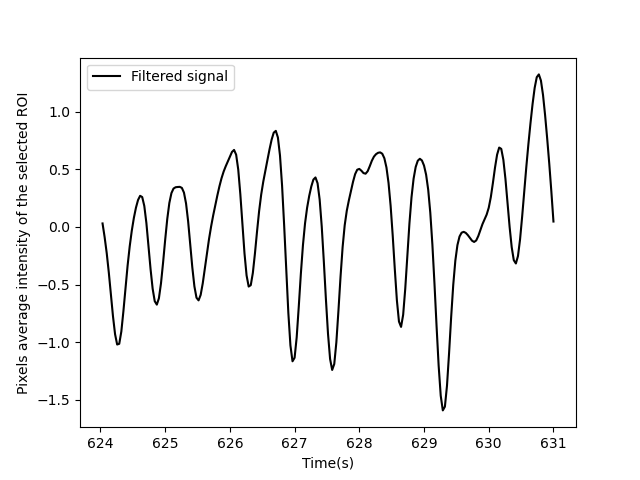

In [11]:
plt.plot(t,smooth_data,'k-', label='Filtered signal')
plt.legend(loc='best')
plt.xlabel('Time(s)')
plt.ylabel('Pixels average intensity of the selected ROI')
plt.show()

## Find Peaks

The find_peaks parameters vary depending on the data. The values for different data sets will then be presented.

### Trial 2
- Zebrafish 2.2
    - (bn = 454, fn = 472, region = 'Heart') height = 0, distance = 10, threshold = 0.0001
- Zebrafish 2.4
    - (bn = 205, fn = 273, region = 'Heart') height = 0, distance = 12, threshold = 0.0001
    - (bn = 290, fn = 326, region = 'Heart') height = -2, distance = 13, threshold = 0.0001
- Zebrafish 2.5
    - (bn = 564, fn = 630, region = 'Heart') height = 0.35, distance = 12, threshold = 0.0001
    - (bn = 564, fn = 630, region = 'Operculum') height = 0.2, distance = 8, threshold = 0.0001
    
### Trial 3
- Zebrafish 3.2
    - (bn = 210, fn = 235, region = 'Heart') height = -2, distance = 7, threshold = 0.00001
- Zebrafish 3.4
    - (bn = 624, fn = 631, region = 'Heart') height = -1, distance = 15, threshold = 0.00001

<IPython.core.display.Javascript object>


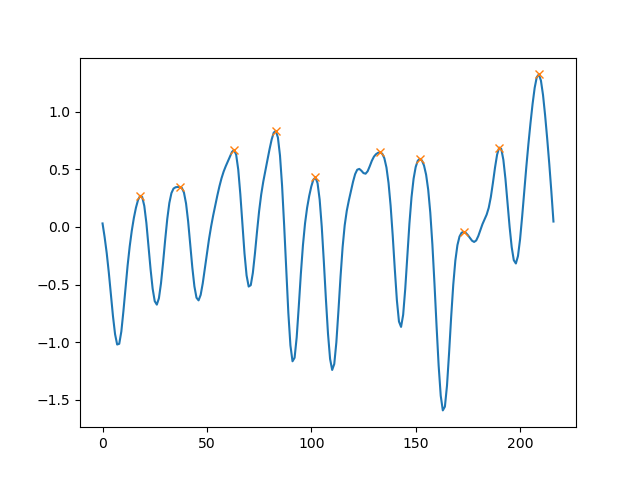

In [12]:
# Selection of peaks present in the signal
peaks, _ = find_peaks(smooth_data, height =-1,distance = 15, threshold = 0.00001) 

plt.plot(smooth_data)
plt.plot(peaks, smooth_data[peaks], "x")
plt.show()

## Heart rate Calculation

In [17]:
heart_beat = []

for n in range(len(peaks)-1):
    delta_t = time[peaks[n+1]]-time[peaks[n]]
    if delta_t < 7:
        f_min = 60/delta_t
        heart_beat.append(f_min)
        
    else:
        print("error")

print('Heart rate: {} bpm'.format(round(np.mean(heart_beat),1)))

Heart rate: 90.5 bpm
